### Math Final Project - Group 3

#### Members:
<ul>
    <li>Narjes Amousoltani F.</li>
    <li>Aanandita Madan Chavan</li>
    <li>Jorge Luis Galarraga Prince</li>
    <li>Mark Kale, Abdullah Malik</li>
    <li>Shreeya Shah</li>
    <li>Sirjana Shrestha</li>
    <li>Dushyant Tyagi</li>
</ul>

##### Dataset link: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

# Preprocessing section

Importing all the libraries and methods

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

import matplotlib.pyplot as plt
%matplotlib inline

## Importing the dataset

In [3]:
df = pd.read_csv('Hotel_Reservations.csv')

In [4]:
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

## Encoding categorical data

### Encoding the Independent Variable

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = df.iloc[:, -1].values
y_encoded = le.fit_transform(y)
y_encoded

array([1, 1, 0, ..., 1, 0, 1])

---
# Exploratory Data Analysis 

In [8]:
df.shape

(36275, 19)

##### Observation: We have too many features and few samples, taking into account the number of features.

In [9]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [11]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

---
# Insights

In [12]:
df.booking_status.value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

**67.23% of the booking are not cancelled and 32.76 % of booking are cancelled**

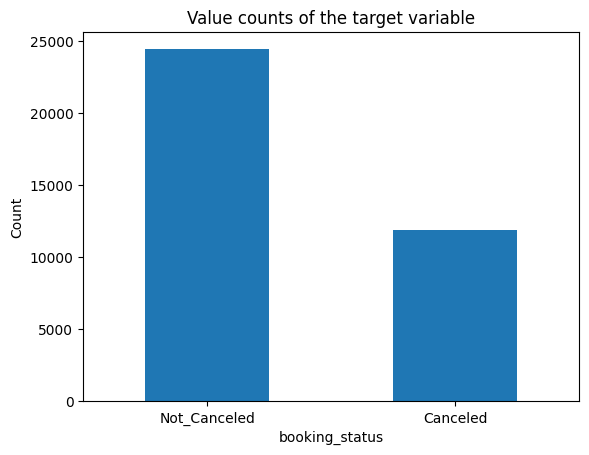

In [13]:
df.booking_status.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("booking_status")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

**Visualization of booking status**

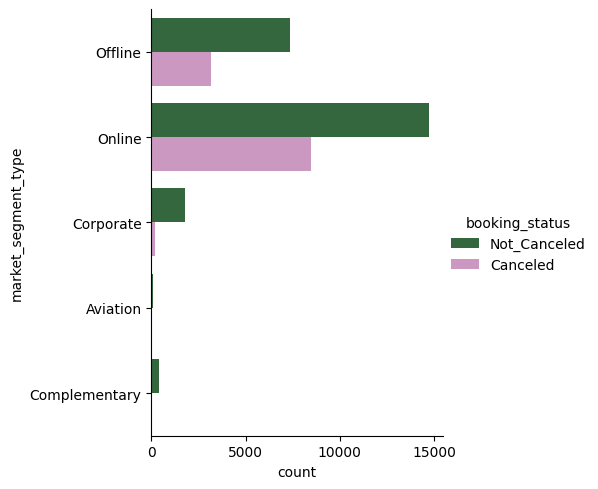

In [14]:
# Booking Status based on Market segmentation
sns.catplot(y="market_segment_type", hue="booking_status", kind="count",
            palette="cubehelix",
            data=df)

Online booking are canceled more than offline, followed by corporate market segment

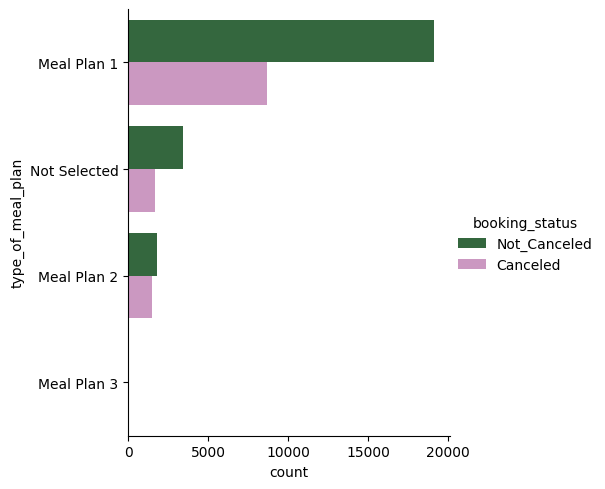

In [15]:
sns.catplot(y="type_of_meal_plan", hue="booking_status", kind="count",
            palette="cubehelix",
            data=df)

Meal Plan 1 is the most popular type of meal_plan

<AxesSubplot: xlabel='room_type_reserved', ylabel='avg_price_per_room'>

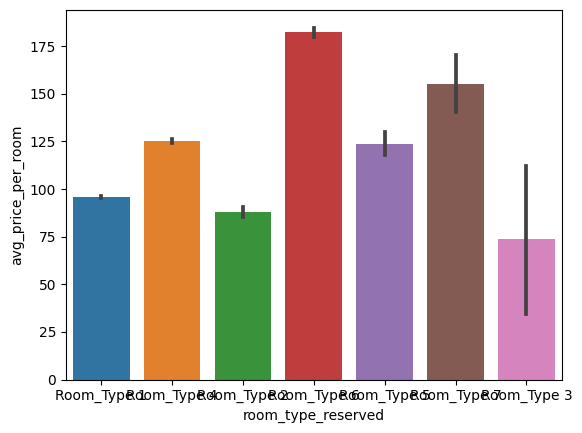

In [16]:
# Average Price per room based on room type reserved
sns.barplot(data=df, x="room_type_reserved", y="avg_price_per_room")

### Encoding market_segment_type'

In [17]:
df['market_segment_type'] = LabelEncoder().fit_transform(df['market_segment_type'])

Observations:
The items below were dropped from the dataset, since they didn't increase the accuracy of the model, moreover, they were categorical items.

room_type_reserved
type_of_meal_plan
Booking_ID

In [18]:
# df.drop(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved'], axis=1, inplace=True)
# df.drop(['Booking_ID', 'type_of_meal_plan'], axis=1, inplace=True) no parameters accuracy score 0.7754295690526509 and 0.7583386933749885 with huber
# df.drop(['Booking_ID', 'room_type_reserved'], axis=1, inplace=True) no parameters accuracy score 0.67 and 0.7746025911972801 with huber
# df.drop(['Booking_ID'], axis=1, inplace=True) no parameters accuracy score 0.7665165855003216 and 0.771110906919048 with huber
# df.drop(['Booking_ID'], axis=1, inplace=True)
# df.drop(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved'], axis=1, inplace=True) no parameters accuracy score 0.7723973169162914 and 0.7655058347882018 with huber
df.drop(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved'], axis=1, inplace=True)

---
# SGD Section

### Training the model 

In [19]:
X = df.drop(['booking_status'], axis=1)
y = df['booking_status']
num_feats = df.shape[1]-1

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Stochastic Gradient Descent for Classification- if booking status is cancelled or not

In [22]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [23]:
SGD_model = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

In [24]:
SGD_model.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [25]:
SGD_predictions = SGD_model.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,SGD_predictions))

[[1675 1847]
 [ 625 6736]]


In [27]:
accuracy_score(y_test, SGD_predictions)

0.7728567490581641

In [28]:
accuracy_score(y_test, SGD_predictions, normalize=False)

8411

### Scale the dataset

In [29]:
from sklearn.preprocessing import MinMaxScaler   # Transforms features by scaling each feature to a given range

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)   # 

In [30]:
SGD_model.fit(X_train, y_train)
X_test = scaler.fit_transform(X_test)
SGD_predictions = SGD_model.predict(X_test)

In [31]:
print(confusion_matrix(y_test,SGD_predictions))

[[2684  838]
 [1594 5767]]


In [32]:
accuracy_score(y_test, SGD_predictions)

0.7765322061931452

In [33]:
accuracy_score(y_test, SGD_predictions, normalize=False)

8451

---
### Use of GridSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {'loss':[ 'hinge', 'log_loss', 'modified_huber'], 
              'alpha': [0.0001, 0.001, 0.01, 0.1]}

In [36]:
SGD_model = SGDClassifier()

In [37]:
grid = GridSearchCV(SGD_model, param_grid)

In [38]:
#%time
grid.fit(X_train, y_train)

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'loss': ['hinge', 'log_loss', 'modified_huber']})

In [39]:
grid.best_estimator_

SGDClassifier(loss='log_loss')

In [40]:
model = grid.best_estimator_
model

SGDClassifier(loss='log_loss')

In [41]:
grid.best_params_

{'alpha': 0.0001, 'loss': 'log_loss'}

In [42]:
yfit = model.predict(X_test)

In [43]:
confusion_matrix(y_test, yfit)

array([[2689,  833],
       [1571, 5790]], dtype=int64)

In [44]:
accuracy_score(y_test, yfit)

0.7791050261876321

### Feature Selection

C:\Windows\Temp\ipykernel_16188\1244643595.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<AxesSubplot: >

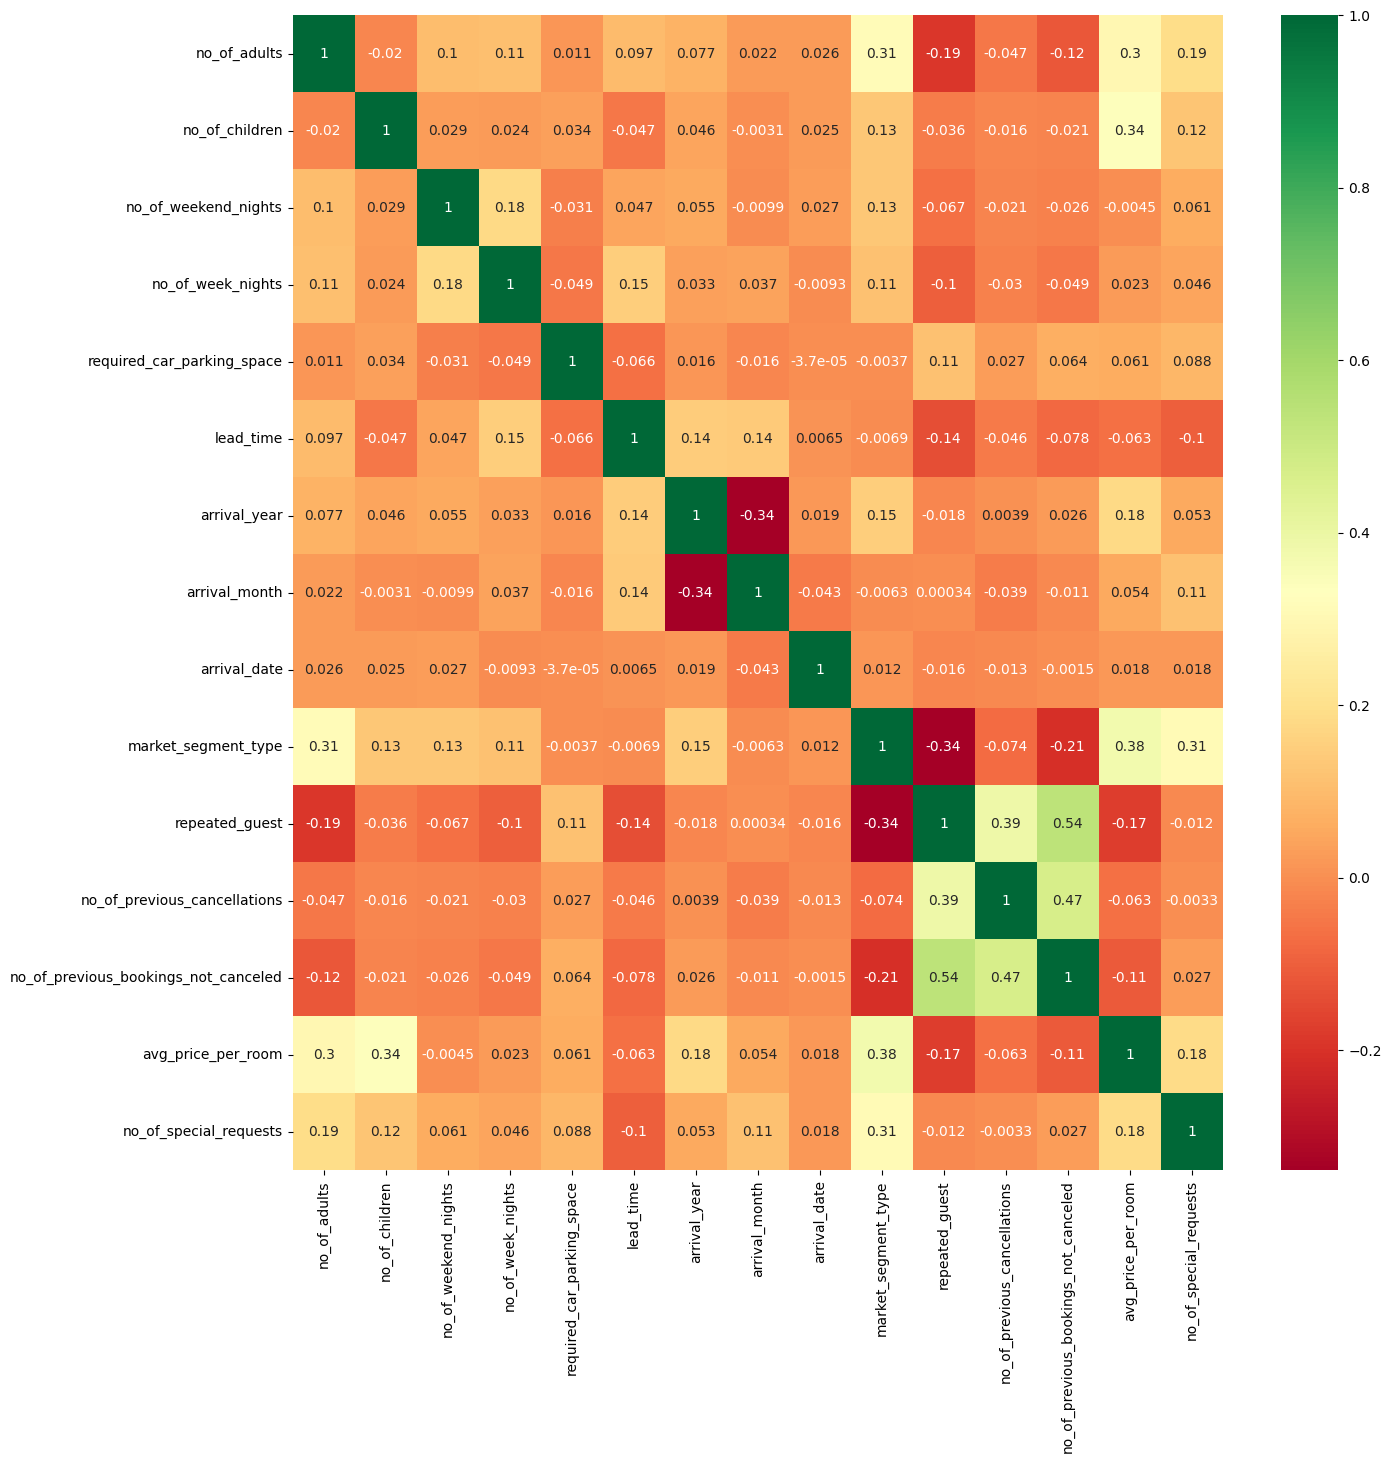

In [45]:
# Correlation among the variables
corrmat = df.corr()
top_corr_features = corrmat.index
plt.rcParams['figure.figsize'] = [15, 15]
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [46]:
feature_name = list(X.columns)
feature_name

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

**Chi-square**

In [47]:
def chi_squared_selector(X, y, num_feats):
    X_norm = MinMaxScaler().fit_transform(X)
    chi_selector = SelectKBest(chi2, k=num_feats)
    chi_selector.fit(X_norm, y)
    chi_support = chi_selector.get_support()
    chi_feature = X.loc[:, chi_support].columns.tolist()
    return chi_support, chi_feature

In [48]:
chi_support, chi_feature = chi_squared_selector(X, y, num_feats)
chi_feature

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

**RFE**

In [49]:
def rfe_selector(X, y, num_feats):
    X_train = MinMaxScaler().fit_transform(X)
    lr = LogisticRegression(solver='lbfgs')
    rfe_lr = RFE(estimator=lr, 
             n_features_to_select=5,
             step=1,
             verbose=5)
    rfe_lr = rfe_lr.fit(X_train, y)
    rfe_lr_support = rfe_lr.get_support()
    rfe_lr_feature = X.loc[:, rfe_lr_support].columns.tolist()
    return rfe_lr_support, rfe_lr_feature

In [50]:
rfe_lr_support, rfe_lr_feature = rfe_selector(X, y, num_feats)
rfe_lr_feature

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


['required_car_parking_space',
 'lead_time',
 'market_segment_type',
 'avg_price_per_room',
 'no_of_special_requests']

**Logistic Regression (Lasso)**

In [51]:
def embedded_log_reg_selector(X, y, num_feats):
    logreg = LogisticRegression(penalty='l1', solver='liblinear')
    embedded_lr_selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', max_iter=50000), max_features=num_feats)
    embedded_lr_selector = embedded_lr_selector.fit(X, y)
    embedded_lr_support = embedded_lr_selector.get_support()
    embedded_lr_feature = X.loc[:, embedded_lr_support].columns.tolist()
    return embedded_lr_support, embedded_lr_feature

In [52]:
embedded_lr_support, embedded_lr_feature = embedded_log_reg_selector(X, y, num_feats)
embedded_lr_feature

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

**Tree based Randonm Forest**

In [53]:
def embedded_rf_selector(X, y, num_feats):
    rf = RandomForestClassifier(n_estimators=100)
    embedded_rf_selector = SelectFromModel(rf, 
                           max_features=num_feats)
    embedded_rf_selector = embedded_rf_selector.fit(X, y)
    embedded_rf_support = embedded_rf_selector.get_support()
    embedded_rf_feature = X.loc[:, embedded_rf_support].columns.tolist()
    return embedded_rf_support, embedded_rf_feature

In [54]:
embedded_rf_support, embedded_rf_feature = embedded_rf_selector(X, y, num_feats)
embedded_rf_feature

['lead_time',
 'arrival_month',
 'arrival_date',
 'avg_price_per_room',
 'no_of_special_requests']

**Tree based LightGBM**

In [55]:
def embedded_lgbm_selector(X, y, num_feats):
    lgbmc = LGBMClassifier(n_estimators=500,
                           learning_rate=0.05,
                           num_leaves=32,
                           colsample_bytree=0.2,
                           reg_alpha=3,
                           reg_lambda=1,
                           min_split_gain=0.01,
                           min_child_weight=40)
    embedded_lgbm_selector = SelectFromModel(lgbmc, 
                                             max_features=num_feats)
    embedded_lgbm_selector = embedded_lgbm_selector.fit(X, y)
    embedded_lgbm_support = embedded_lgbm_selector.get_support()
    embedded_lgbm_feature = X.loc[:, embedded_lgbm_support].columns.tolist()
    
    return embedded_lgbm_support, embedded_lgbm_feature

In [56]:
embedded_lgbm_selector(X, y, num_feats)

(array([False, False, False, False, False,  True, False,  True,  True,
        False, False, False, False,  True, False]),
 ['lead_time', 'arrival_month', 'arrival_date', 'avg_price_per_room'])

In [57]:
def autoFeatureSelector(dataset_path, methods=[]):
    if 'chi-square' in methods:
        chi_support, chi_feature = chi_squared_selector(X, y,num_feats)
    if 'rfe' in methods:
        rfe_support, rfe_feature = rfe_selector(X, y,num_feats)
    if 'log-reg' in methods:
        embedded_lr_support, embedded_lr_feature = embedded_log_reg_selector(X, y, num_feats)
    if 'rf' in methods:
        embedded_rf_support, embedded_rf_feature = embedded_rf_selector(X, y, num_feats)
    if 'lgbm' in methods:
        embedded_lgbm_support, embedded_lgbm_feature = embedded_lgbm_selector(X, y, num_feats)
    
    
    pd.set_option('display.max_rows', None)

    
    feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embedded_lr_support,
                                    'Random Forest':embedded_rf_support, 'LightGBM':embedded_lgbm_support})

    feature_selection_df['Total'] = feature_selection_df.sum(axis=1)
    feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
    feature_selection_df.index = range(1, len(feature_selection_df)+1)
    feature_selection_df.head(num_feats)

    return feature_selection_df

In [58]:
best_features = autoFeatureSelector(dataset_path="Hotel_Reservations.csv", methods=['chi-square', 'rfe', 'log-reg', 'rf', 'lgbm'])
best_features.head(20)

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


C:\Windows\Temp\ipykernel_16188\3123419553.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_selection_df['Total'] = feature_selection_df.sum(axis=1)


,Feature,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,lead_time,True,True,True,True,True,5
2,avg_price_per_room,True,True,True,True,True,5
3,no_of_special_requests,True,True,True,True,False,4
4,arrival_month,True,False,True,True,True,4
5,arrival_date,True,False,True,True,True,4
6,required_car_parking_space,True,True,True,False,False,3
7,market_segment_type,True,True,True,False,False,3
8,repeated_guest,True,False,True,False,False,2
9,no_of_weekend_nights,True,False,True,False,False,2
10,no_of_week_nights,True,False,True,False,False,2


### Dropping the  least important features based on ranking of feature selector

In [59]:
X = df.drop(['booking_status','no_of_children',
            'no_of_adults','arrival_year'], axis=1)
y = df['booking_status']
num_feats = df.shape[1]-1

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

---
### Fitting the model

In [61]:
SGD_model.fit(X_train, y_train)

SGDClassifier()

In [62]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)   # 

In [63]:
SGD_model.fit(X_train, y_train)
X_test = scaler.fit_transform(X_test)
SGD_predictions = SGD_model.predict(X_test)

In [64]:
confusion_matrix(y_test, SGD_predictions)

array([[2618,  904],
       [1538, 5823]], dtype=int64)

In [65]:
accuracy_score(y_test, SGD_predictions)

0.7756133419094

In [66]:
accuracy_score(y_test, SGD_predictions, normalize=False)

8441

---
# Random Forest Regression

In [165]:
X = df.drop(['booking_status'], axis=1)
y = df['booking_status']

### Splitting the dataset into the Training set and Test set

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 1)

### Training the Random Forest Regression model on the whole dataset

In [167]:
RF_clf = RandomForestClassifier(n_estimators=100, max_features='auto', max_samples=0.75, n_jobs=-1, verbose = 1)

In [168]:
RF_clf.fit(X_train, y_train)

C:\Users\ks010\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished


RandomForestClassifier(max_features='auto', max_samples=0.75, n_jobs=-1,
                       verbose=1)

In [169]:
RF_pred = RF_clf.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [170]:
n_nodes = []
max_depths = []

for ind_tree in RF_clf.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 6457
Average maximum depth 34


In [171]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix

print('Accuracy Score : ' + str(accuracy_score(y_test,RF_pred)))
print('Precision Score : ' + str(precision_score(y_test,RF_pred)))
print('Recall Score : ' + str(recall_score(y_test,RF_pred)))
print('F1 Score : ' + str(f1_score(y_test,RF_pred)))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,RF_pred)))

Accuracy Score : 0.9062715368711234
Precision Score : 0.9148184494602551
Recall Score : 0.9498675361728144
F1 Score : 0.932013597280544
Confusion Matrix : 
[[1914  434]
 [ 246 4661]]


Confusion matrix, without normalization
[[1905  443]
 [ 234 4673]]


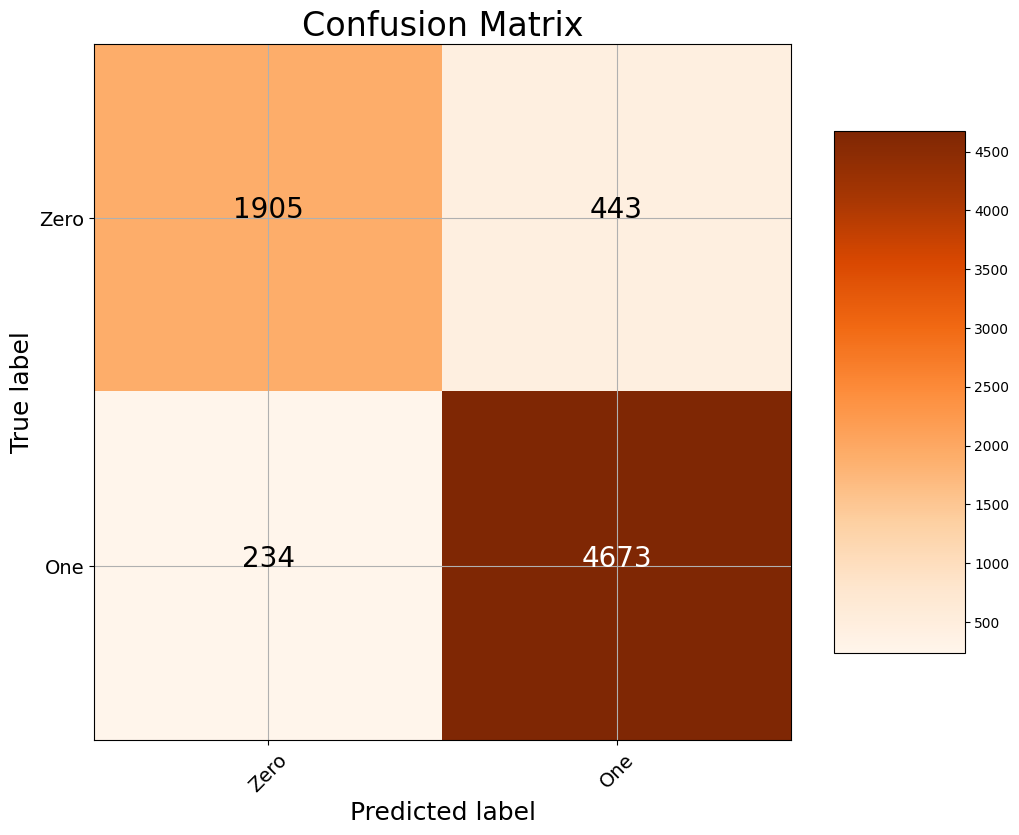

In [172]:
plot_confusion_matrix(cm, classes = ['Zero', 'One'],
                      title = 'Confusion Matrix')

### Scaling the Model

In [173]:
from sklearn.preprocessing import  StandardScaler, MinMaxScaler

scale_x =MinMaxScaler()
X_train_scale = scale_x.fit_transform(X_train)
X_test_scale = scale_x.transform(X_test)

model = RandomForestClassifier(n_estimators=100, max_features='auto', max_samples=0.75, n_jobs=-1, verbose = 1)
model.fit(X_train_scale, y_train)
y_pred_scale = model.predict(X_test_scale)

C:\Users\ks010\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [174]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_scale)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_scale)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_scale)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_scale)))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_scale)))

Accuracy Score : 0.9028256374913852
Precision Score : 0.9135826771653544
Recall Score : 0.9457917261055635
F1 Score : 0.92940823069991
Confusion Matrix : 
[[1909  439]
 [ 266 4641]]



### GridSearchCV for Random Forest

In [175]:
#assigned value to hyperparameters for testing - hyperparameter tunning
n_estimators = [20,60,100,120]
max_features = ['auto', 'sqrt','log2']
max_depths = [60, 90, 110]
min_samples_leaf = [2, 3, 4]
min_samples_split= [8, 10, 12]
criterion = ['gini', 'entropy']

In [176]:
pm_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depths,
           'min_samples_leaf': min_samples_leaf,
           'min_samples_split': min_samples_split,
           'criterion': criterion,
            }
print(pm_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [60, 90, 110], 'min_samples_leaf': [2, 3, 4], 'min_samples_split': [8, 10, 12], 'criterion': ['gini', 'entropy']}


In [177]:
RF = RandomForestClassifier()

RF_Grid = GridSearchCV(estimator=RF,          
                       param_grid=pm_grid,
                       cv=3,
                       verbose=2,              
                       n_jobs=-1,
                       scoring= 'recall'
)

In [178]:
RF_Grid.fit(X_train,y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [60, 90, 110],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [20, 60, 100, 120]},
             scoring='recall', verbose=2)

In [179]:
RF_Grid.best_params_

{'criterion': 'gini',
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [180]:
RF_Grid.best_estimator_  

RandomForestClassifier(max_depth=90, min_samples_leaf=2, min_samples_split=10)

In [181]:
RF_Grid_pred = RF_Grid.predict(X_test)

In [182]:
print('Accuracy Score : ' + str(accuracy_score(y_test,RF_Grid_pred)))
print('Precision Score : ' + str(precision_score(y_test,RF_Grid_pred)))
print('Recall Score : ' + str(recall_score(y_test,RF_Grid_pred)))
print('F1 Score : ' + str(f1_score(y_test,RF_Grid_pred)))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,RF_Grid_pred)))

Accuracy Score : 0.8934527911784976
Precision Score : 0.9012034161490683
Recall Score : 0.9461993071122886
F1 Score : 0.9231533949696789
Confusion Matrix : 
[[1839  509]
 [ 264 4643]]


Confusion matrix, without normalization
[[1839  509]
 [ 264 4643]]


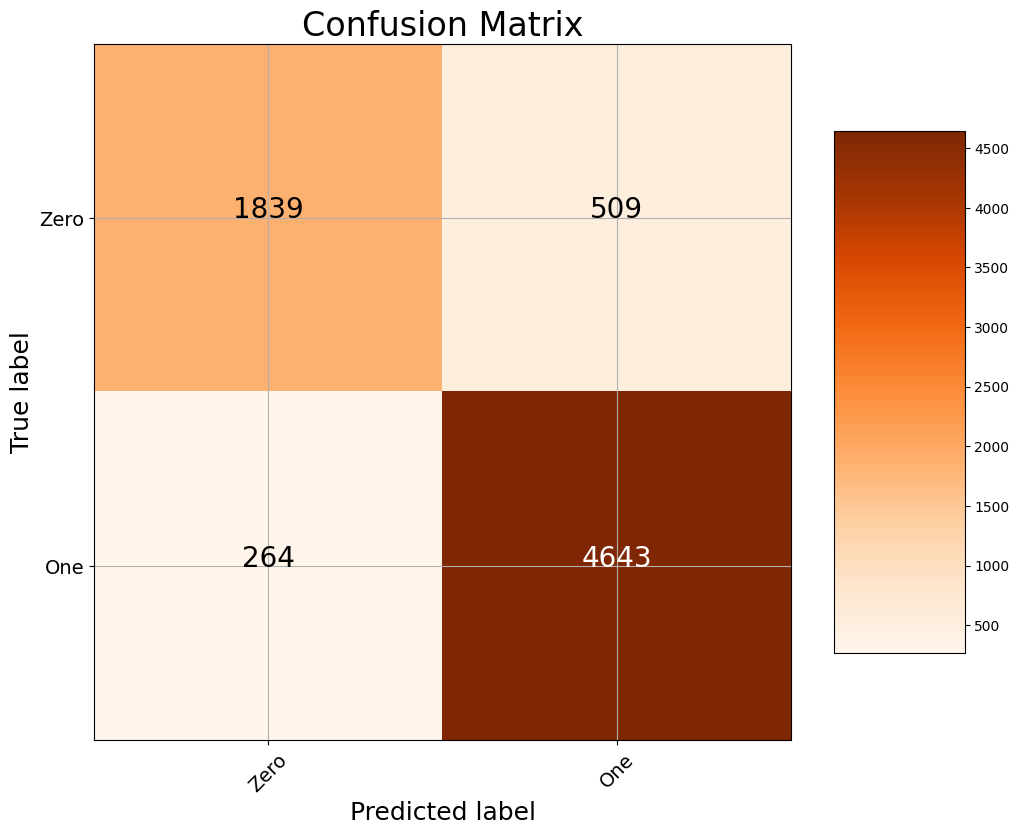

In [183]:
cm2 = confusion_matrix(y_test,RF_Grid_pred)
cm2

plot_confusion_matrix(cm2, classes = ['Zero', 'One'], 
                      title = 'Confusion Matrix')

### Dropping the least important features based on ranking of feature selector

In [201]:
X_rf = df.drop(['booking_status', 'no_of_special_requests', 'arrival_month','arrival_date'], axis=1)
y = df['booking_status']

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_encoded, test_size=0.30, random_state=1)

In [208]:
RF_clf = RandomForestClassifier(n_estimators=100, max_features='auto', max_samples=0.75, n_jobs=-1, verbose = 1)

In [209]:
RF_clf.fit(X_train, y_train)

C:\Users\ks010\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.0s finished


RandomForestClassifier(max_features='auto', max_samples=0.75, n_jobs=-1,
                       verbose=1)

In [210]:
RF_pred = RF_clf.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.5s finished


In [211]:
print('Accuracy Score : ' + str(accuracy_score(y_test,RF_pred)))
print('Precision Score : ' + str(precision_score(y_test,RF_pred)))
print('Recall Score : ' + str(recall_score(y_test,RF_pred)))
print('F1 Score : ' + str(f1_score(y_test,RF_pred)))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,RF_pred)))

Accuracy Score : 0.837452908205458
Precision Score : 0.8615205585725368
Recall Score : 0.9051759271838066
F1 Score : 0.8828088771116264
Confusion Matrix : 
[[2451 1071]
 [ 698 6663]]


----------

Grid search after removing features

In [195]:
#assigned value to hyperparameters for testing - hyperparameter tunning
n_estimators = [20,60,100,120]
max_features = ['auto', 'sqrt','log2']
max_depths = [60, 90, 110]
min_samples_leaf = [2, 3, 4]
min_samples_split= [8, 10, 12]
criterion = ['gini', 'entropy']

In [198]:
pm_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depths,
           'min_samples_leaf': min_samples_leaf,
           'min_samples_split': min_samples_split,
           'criterion': criterion,
            }
print(pm_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [60, 90, 110], 'min_samples_leaf': [2, 3, 4], 'min_samples_split': [8, 10, 12], 'criterion': ['gini', 'entropy']}


In [199]:
RF = RandomForestClassifier()

RF_Grid = GridSearchCV(estimator=RF,          
                       param_grid=pm_grid,
                       cv=3,
                       verbose=2,              
                       n_jobs=-1,
                       scoring= 'recall'
)

In [ ]:
RF_Grid.fit(X_train,y_train)

In [ ]:
RF_Grid.best_params_

{'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 20}

In [ ]:
RF_Grid.best_estimator_

RandomForestClassifier(max_depth=60, max_features='auto', min_samples_leaf=2,
                       min_samples_split=8, n_estimators=20)

In [ ]:
RF_Grid_pred = RF_Grid.predict(X_test)

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(y_test,RF_Grid_pred)))
print('Precision Score : ' + str(precision_score(y_test,RF_Grid_pred)))
print('Recall Score : ' + str(recall_score(y_test,RF_Grid_pred)))
print('F1 Score : ' + str(f1_score(y_test,RF_Grid_pred)))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,RF_Grid_pred)))

Accuracy Score : 0.8951575852246623


ValueError: pos_label=1 is not a valid label. It should be one of ['Canceled', 'Not_Canceled']

---